(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


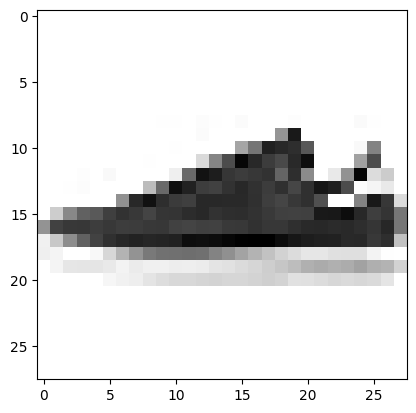

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt      
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

hinh = x_train[6]
plt.imshow(hinh, cmap= plt.cm.binary)    
# plt.imshow(anh)                           

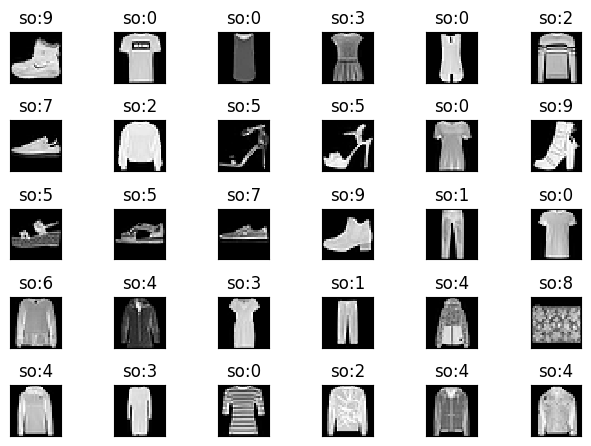

In [ ]:
for i in range(30):  # 30 hình ảnh
  plt.subplot(5,6,i+1) # 6 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray', interpolation='none')
  plt.title('so:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
x_train = x_train.reshape((60000,28,28,1)) # đầu tiên là t reset 600000 tấm ảnh và chuyển từ ảnh 2D thành ảnh 1D kích thước 28*28
x_train = x_train.astype('float32')/255        #chuyển qua mã array chuyển sang số thực           
print(x_train.shape)

x_test = x_test.reshape((10000,28,28,1))    # lệnh định dạng
x_test = x_test.astype('float32')/255
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from keras.utils import to_categorical # chuyển qua one host encording mã hóa 1 số về số 1 dùng để chuyển cho output
y_train = to_categorical(y_train)  
y_test= to_categorical(y_test)



In [ ]:
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
batch_size=64
epochs=20
classes =10

In [ ]:
model= Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha =0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha =0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
from keras.backend import categorical_crossentropy
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))

model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()

train=model.fit(x_train,y_train,batch_size,epochs=epochs,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:
model.save('CNN_AI_10_4.h5')

XLA on Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [ ]:
folder = '/content/drive/MyDrive/anh/anhtest/'

photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Bản sao của Binh'):
    output = 1.0
  if file.startswith('Bản sao của DangKhoa'):
    output = 2.0
  photo = load_img(folder + file, target_size = (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/anh/anhtest/binh_khoa_photos.npy',photos)
save('/content/drive/MyDrive/anh/anhtest/binh_khoa_labels.npy',labels)

(20, 30, 40, 3) (20,)
